### In part two, we will focus on-

* implementing several machine learning methods,
* selecting the best model,
* and optimizing it for our problem using hyperparameter tuning with cross validation.

As a final step here, we will save the datasets we developed to use again in the next part.

In [13]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score

## Read in Data

In [15]:
X_train =pd.read_csv("data/X_train.csv")
X_test =pd.read_csv("data/X_test.csv")
y_train =pd.read_csv("data/y_train.csv", header=None)
y_test =pd.read_csv("data/y_test.csv", header=None)

In [16]:
# Display sizes of data
print('Training Feature Size: ', X_train.shape)
print('Testing Feature Size:  ', X_test.shape)
print('Training Labels Size:  ', y_train.shape)
print('Testing Labels Size:   ', y_test.shape)

Training Feature Size:  (38460, 74)
Testing Feature Size:   (16483, 74)
Training Labels Size:   (38460, 1)
Testing Labels Size:    (16483, 1)


In [17]:
# Construct some Classifier objects
clf_gbm = GradientBoostingClassifier()
clf_xgboost = XGBClassifier()

In [18]:
# Set grid search params

param_range = [1,2,3]

grid_params_gbm = {'n_estimators':[1000],'learning_rate':[0.03,0.05,0.1],'min_samples_leaf': param_range,
                    'max_depth': param_range,'min_samples_split': param_range[1:]}


grid_params_xgm = {'n_estimators':[1000],'eta':[0.01,0.1,1],'min_samples_leaf': param_range,
                    'max_depth': param_range,'min_samples_split': param_range[1:],'alpha':[0.01,0.03,0.04]}

# Construct grid searches
jobs = -1

rs_gbm = RandomizedSearchCV(estimator=clf_gbm, param_distributions =grid_params_gbm, scoring='roc_auc', cv=10, n_jobs=jobs)
rs_xgboost = RandomizedSearchCV(estimator=clf_xgboost, param_distributions =grid_params_xgm, scoring='roc_auc', cv=10, n_jobs=jobs)

In [19]:
# List of pipelines for ease of iteration
grids = [rs_gbm,rs_xgboost]
# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Gradient Boosting Classifier', 1: 'XG Boost Classifier'}

In [20]:
# Fit the grid search objects
print('Performing model optimizations...')
best_roc_auc = 0.0
best_clf = 0
best_rs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training roc auc: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set roc_auc score for best params: %.3f ' % roc_auc_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if roc_auc_score(y_test, y_pred) > best_roc_auc:
        best_roc_auc = roc_auc_score(y_test, y_pred)
        best_rs = gs
        best_clf = idx
print('\nClassifier with best test set roc_auc score: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Gradient Boosting Classifier


C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best params: {'n_estimators': 1000, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.1}
Best training accuracy: 0.765
Test set accuracy score for best params: 0.692 

Estimator: XG Boost Classifier


C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best params: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 3, 'eta': 0.1, 'alpha': 0.01}
Best training accuracy: 0.766
Test set accuracy score for best params: 0.693 

Classifier with best test set roc_auc score: XG Boost Classifier


In [25]:
# Applying XGBoost Classifier with hypertuned parameters

params_xgm={'n_estimators': [1000], 'min_samples_split': [2], 'min_samples_leaf': [3], 'max_depth': [3], 'eta': [0.1], 'alpha': [0.01]}
xg = XGBClassifier()
rsxg = RandomizedSearchCV(estimator=xg, param_distributions =params_xgm, scoring='roc_auc', cv=10, n_jobs=jobs)
rsxg.fit(X_train,y_train)
y_pred = rsxg.predict(X_test)
xg_score = accuracy_score(y_test,y_pred)
x= roc_auc_score(y_test, y_pred)

C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
print("ROC-AUC score: ",x)
print("Accuracy score: ", xg_score)

ROC-AUC score:  0.6927676328722694
Accuracy score:  0.7010859673603106


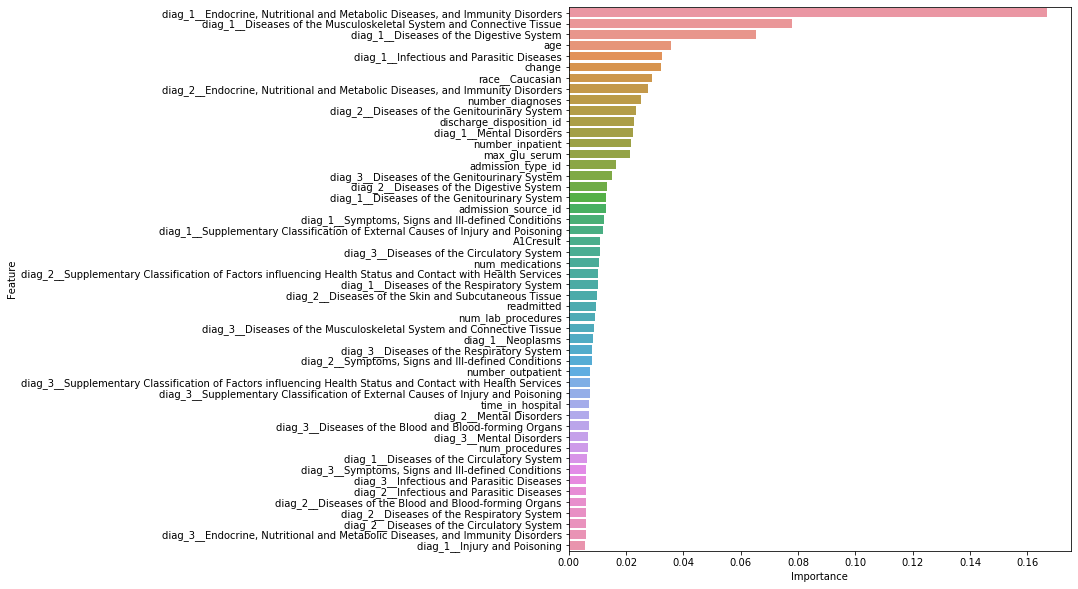

In [48]:
Feature_importance=pd.DataFrame()
Feature_importance["Feature"] = list(X_train.columns)
Feature_importance["Importance"] = rsxg.best_estimator_.feature_importances_
Feature_importance.sort_values("Importance",  ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(9,10))
sns.barplot(data=Feature_importance[:50],x='Importance',y='Feature')
plt.show()

Inference:
 * Most of the features especially after the 'max_glu_serum' hardly contribute in the Classification
 * Instead of Feature -Selection, we think that Principal Component Analysis can be performed to capture variance from all the features rather relying on few important ones.

# Principal Component Analysis

In [97]:
pipe_knn_pca = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=15)),('clf', KNeighborsClassifier())])

pipe_rf_pca = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=15)),('clf', RandomForestClassifier())])

pipe_gb_pca = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=15)),('clf', GradientBoostingClassifier())])

pipe_xg_pca = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=15)),('clf', XGBClassifier())])

In [98]:
knn_params = {'clf__n_neighbors':[40,250,500], 'clf__weights':['uniform','distance']}

rf_params = {'clf__criterion': ['gini', 'entropy'],'clf__min_samples_leaf': param_range,'clf__max_depth': param_range,
              'clf__min_samples_split': param_range[1:]}

gb_params = {'clf__n_estimators':[900],'clf__learning_rate':[0.03,0.05,0.1],'clf__min_samples_leaf': param_range,
                    'clf__max_depth': param_range,'clf__min_samples_split': param_range[1:]}


params_xgm = {'clf__n_estimators':[900],'clf__eta':[0.01,0.1,1],'clf__min_samples_leaf': param_range,
                    'clf__max_depth': param_range,'clf__min_samples_split': param_range[1:],'clf__alpha':[0.01,0.03,0.04]}

In [99]:
rs_knn = RandomizedSearchCV(estimator=pipe_knn_pca, param_distributions =knn_params, scoring='roc_auc', cv=10, n_jobs=jobs)
rs_rf = RandomizedSearchCV(estimator=pipe_rf_pca, param_distributions =rf_params, scoring='roc_auc', cv=10, n_jobs=jobs)
rs_gbm = RandomizedSearchCV(estimator=pipe_gb_pca, param_distributions =gb_params, scoring='roc_auc', cv=10, n_jobs=jobs)
rs_xgboost = RandomizedSearchCV(estimator=pipe_xg_pca, param_distributions =params_xgm, scoring='roc_auc', cv=10, n_jobs=jobs)

In [100]:
# List of pipelines for ease of iteration
grids = [rs_knn,rs_rf,rs_gbm,rs_xgboost]
# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'K Nearest Neighbour',1:'Random Forest Classifier',2: 'PCA-Gradient Boosting Classifier', 3: 'PCA-XG Boost Classifier'}

In [101]:
# Fit the grid search objects
print('Performing model optimizations...')
best_roc_auc = 0.0
best_clf = 0
best_rs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training roc auc: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set roc_auc score for best params: %.3f ' % roc_auc_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if roc_auc_score(y_test, y_pred) > best_roc_auc:
        best_roc_auc = roc_auc_score(y_test, y_pred)
        best_rs = gs
        best_clf = idx
print('\nClassifier with best test set roc_auc score: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: K Nearest Neighbour


C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Best params: {'clf__weights': 'distance', 'clf__n_neighbors': 250}
Best training roc auc: 0.699
Test set roc_auc score for best params: 0.639 

Estimator: Random Forest Classifier


C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Best params: {'clf__min_samples_split': 2, 'clf__min_samples_leaf': 3, 'clf__max_depth': 3, 'clf__criterion': 'gini'}
Best training roc auc: 0.663
Test set roc_auc score for best params: 0.563 

Estimator: PCA-Gradient Boosting Classifier


C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best params: {'clf__n_estimators': 900, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 3, 'clf__max_depth': 2, 'clf__learning_rate': 0.05}
Best training roc auc: 0.696
Test set roc_auc score for best params: 0.642 

Estimator: PCA-XG Boost Classifier


C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best params: {'clf__n_estimators': 900, 'clf__min_samples_split': 3, 'clf__min_samples_leaf': 3, 'clf__max_depth': 2, 'clf__eta': 1, 'clf__alpha': 0.01}
Best training roc auc: 0.699
Test set roc_auc score for best params: 0.640 

Classifier with best test set roc_auc score: PCA-Gradient Boosting Classifier
